In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('new_correct_dataset.xlsx')
# data_csv= pd.read_csv('new_correct_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   code sample                     60 non-null     object        
 1   planting date                   60 non-null     datetime64[ns]
 2   harvest date                    60 non-null     datetime64[ns]
 3   shape (regular/Irregular)       60 non-null     object        
 4   root health                     60 non-null     object        
 5   root length (cm)                59 non-null     float64       
 6   plant height(cm)                59 non-null     float64       
 7   weight (g)                      59 non-null     float64       
 8   chlorophyll(a) (mg/g)           8 non-null      float64       
 9   plant dry matter (%)            8 non-null      float64       
 10  leaf count (no.)                59 non-null     float64       
 11  leaf siz

In [4]:
data.head()

,code sample,planting date,harvest date,shape (regular/Irregular),root health,root length (cm),plant height(cm),weight (g),chlorophyll(a) (mg/g),plant dry matter (%),leaf count (no.),leaf size (cm2),disease occurrence trends,water use efficiency,energy consumption,growth rate,nutrient absorption efficiency,marketable yield,flowering,notes
0,S1A10,2025-03-18,2025-04-05,R,Good,27.0,33.0,114.0,NaN,NaN,26.0,108.00,no,NaN,NaN,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...
1,S1A8,2025-03-18,2025-11-05,R,Good,26.0,34.0,38.0,NaN,NaN,29.0,101.25,no,NaN,NaN,NaN,NaN,NaN,yes,NaN
2,S1A6,2025-03-18,2025-11-05,R,Good,25.0,35.0,60.0,NaN,NaN,53.0,108.00,no,NaN,NaN,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...
3,S1B9,2025-03-18,2025-04-05,R,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,It was observed that the plant is dead.
4,S1B7,2025-03-18,2025-11-05,R,Good,20.0,41.0,136.0,0.64,9.28,73.0,108.00,no,NaN,NaN,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...


#### Feature engineering

1. code sample to be used to identify solar/grid energy source. S1 & 4 are solar, S2 & 3 are grid - CHECK
2. planting and harvest dates to be converted to British standard and new feature to be created - timedelta from planting to harvest - CHECK
3. shape R/I replaced - one-hot encoded as shape-R, shape-IR - CHECK
4. all numeric values to be converted to float - CHECK
5. marketable yield can be removed - weight used as target value 
6. chlorophyll data present only for 8/60 observations hence can't be effectively used for nutrient absorption efficiency either
7. disease occurence trend to be converted to True/False - CAN BE REMOVED THEY'RE ALL HEALTHY
8. plant dry matter has too little observations to be reliable in this case
9. root health to be converted to float  - CAN BE REMOVED THEY'RE ALL HEALTHY

In [5]:
"""1. code sample to be used to identify solar/grid energy source. S1 & 4 are solar, S2 & 3 are grid."""

import re

def extract_shelf(code):
    match = re.match(r'S(\d+)', code)
    if match:
        return int(match.group(1))
    return None

data['shelf'] = data['code sample '].apply(extract_shelf)
data['energy-solar'] = data['shelf'].isin([1, 4]).astype(float)
data['energy-grid'] = data['shelf'].isin([2, 3]).astype(float)

In [6]:
"""2. planting and harvest dates to be converted to British standard and new feature to be created - timedelta from planting to harvest"""
import datetime

data['planting date'] = pd.to_datetime(data['planting date'], format='%m/%d/%Y')
data['harvest date '] = pd.to_datetime(data['harvest date '], format='%d/%m/%Y')

data['cor harvest date'] = data['harvest date '].apply(lambda x: datetime.datetime(year=x.year, month = x.day, day = x.month))
data.drop(columns=['harvest date '], inplace=True)

# Calculate time delta in days between planting and harvest
data['growing_period_days'] = (data['cor harvest date'] - data['planting date']).dt.days.astype(float)

In [7]:
data.head()

,code sample,planting date,shape (regular/Irregular),root health,root length (cm),plant height(cm),weight (g),chlorophyll(a) (mg/g),plant dry matter (%),leaf count (no.),...,growth rate,nutrient absorption efficiency,marketable yield,flowering,notes,shelf,energy-solar,energy-grid,cor harvest date,growing_period_days
0,S1A10,2025-03-18,R,Good,27.0,33.0,114.0,NaN,NaN,26.0,...,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...,1,1.0,0.0,2025-05-04,47.0
1,S1A8,2025-03-18,R,Good,26.0,34.0,38.0,NaN,NaN,29.0,...,NaN,NaN,NaN,yes,NaN,1,1.0,0.0,2025-05-11,54.0
2,S1A6,2025-03-18,R,Good,25.0,35.0,60.0,NaN,NaN,53.0,...,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...,1,1.0,0.0,2025-05-11,54.0
3,S1B9,2025-03-18,R,Good,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,It was observed that the plant is dead.,1,1.0,0.0,2025-05-04,47.0
4,S1B7,2025-03-18,R,Good,20.0,41.0,136.0,0.64,9.28,73.0,...,NaN,NaN,NaN,yes,Burning was observed on the upper leaflets of ...,1,1.0,0.0,2025-05-11,54.0


In [8]:
"""shape R/I replaced - one-hot encoded as shape-R, shape-IR"""
data['shape-R'] = data['shape (regular/Irregular)'] == 'R'
data['shape-IR'] = data['shape (regular/Irregular)'] == 'IR'
data[['shape-R','shape-IR']] = data[['shape-R','shape-IR']].astype(float)

In [9]:
"""4. all numeric values to be converted to float""" 
# CHECK

'4. all numeric values to be converted to float'

In [10]:
"""7. disease occurence trend to be converted to True/False"""

# data['disease occurrence trends']
# data['flowering '].value_counts()
data['disease occurrence trends'].value_counts() # CAN BE REMOVED
# data.info()

disease occurrence trends
no    60
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   code sample                     60 non-null     object        
 1   planting date                   60 non-null     datetime64[ns]
 2   shape (regular/Irregular)       60 non-null     object        
 3   root health                     60 non-null     object        
 4   root length (cm)                59 non-null     float64       
 5   plant height(cm)                59 non-null     float64       
 6   weight (g)                      59 non-null     float64       
 7   chlorophyll(a) (mg/g)           8 non-null      float64       
 8   plant dry matter (%)            8 non-null      float64       
 9   leaf count (no.)                59 non-null     float64       
 10  leaf size (cm2)                 58 non-null     float64       
 11  disease 

In [12]:
data['root health '].value_counts() #CAN BE REMOVED

root health 
Good    60
Name: count, dtype: int64

In [13]:
import numpy as np

mapping = {'yes': 1, 'no': 0, np.nan: np.nan}
data['flowering'] = data['flowering '].map(mapping)

selecting only necessary columns

In [14]:
cols_to_keep = [
    'root length (cm)', 'plant height(cm)', 'weight (g)', 
    'leaf count (no.)', 'leaf size (cm2)', 'flowering', 
    'energy-solar', 'energy-grid', 'growing_period_days',
    'shape-R', 'shape-IR'
    ]
df = data[cols_to_keep].copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   root length (cm)     59 non-null     float64
 1   plant height(cm)     59 non-null     float64
 2   weight (g)           59 non-null     float64
 3   leaf count (no.)     59 non-null     float64
 4   leaf size (cm2)      58 non-null     float64
 5   flowering            59 non-null     float64
 6   energy-solar         60 non-null     float64
 7   energy-grid          60 non-null     float64
 8   growing_period_days  60 non-null     float64
 9   shape-R              60 non-null     float64
 10  shape-IR             60 non-null     float64
dtypes: float64(11)
memory usage: 5.3 KB


dealing with Na values

In [16]:
df[df['flowering'].isna()]

,root length (cm),plant height(cm),weight (g),leaf count (no.),leaf size (cm2),flowering,energy-solar,energy-grid,growing_period_days,shape-R,shape-IR
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,47.0,1.0,0.0


In [17]:
df.dropna(subset=['flowering', 'leaf count (no.)'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   root length (cm)     59 non-null     float64
 1   plant height(cm)     59 non-null     float64
 2   weight (g)           59 non-null     float64
 3   leaf count (no.)     59 non-null     float64
 4   leaf size (cm2)      58 non-null     float64
 5   flowering            59 non-null     float64
 6   energy-solar         59 non-null     float64
 7   energy-grid          59 non-null     float64
 8   growing_period_days  59 non-null     float64
 9   shape-R              59 non-null     float64
 10  shape-IR             59 non-null     float64
dtypes: float64(11)
memory usage: 5.5 KB


one missing value in leaf size we will impute with the median

In [18]:
leaf_size_median = df['leaf size (cm2)'].median()
na_index = df['leaf size (cm2)'].index[df['leaf size (cm2)'].isna()][0]
df.loc[na_index, 'leaf size (cm2)'] = leaf_size_median

In [19]:
df['growth_rate'] = df['plant height(cm)']/df['growing_period_days']
df['energy_consumption'] = 0.2 * df['growing_period_days']
# TODO confirm water use efficiency

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   root length (cm)     59 non-null     float64
 1   plant height(cm)     59 non-null     float64
 2   weight (g)           59 non-null     float64
 3   leaf count (no.)     59 non-null     float64
 4   leaf size (cm2)      59 non-null     float64
 5   flowering            59 non-null     float64
 6   energy-solar         59 non-null     float64
 7   energy-grid          59 non-null     float64
 8   growing_period_days  59 non-null     float64
 9   shape-R              59 non-null     float64
 10  shape-IR             59 non-null     float64
 11  growth_rate          59 non-null     float64
 12  energy_consumption   59 non-null     float64
dtypes: float64(13)
memory usage: 8.5 KB


#### EDA

In [21]:
df.corr()

,root length (cm),plant height(cm),weight (g),leaf count (no.),leaf size (cm2),flowering,energy-solar,energy-grid,growing_period_days,shape-R,shape-IR,growth_rate,energy_consumption
root length (cm),1.000000,0.780908,0.763823,0.603555,0.768914,0.392997,0.213759,-0.213759,-0.056410,0.013170,-0.013170,0.779690,-0.056410
plant height(cm),0.780908,1.000000,0.827660,0.729393,0.768006,0.545833,-0.005125,0.005125,-0.017888,0.179541,-0.179541,0.980076,-0.017888
weight (g),0.763823,0.827660,1.000000,0.746359,0.791490,0.416544,0.187101,-0.187101,-0.163388,0.106222,-0.106222,0.840651,-0.163388
leaf count (no.),0.603555,0.729393,0.746359,1.000000,0.559418,0.267158,0.016455,-0.016455,0.319305,0.103148,-0.103148,0.641089,0.319305
leaf size (cm2),0.768914,0.768006,0.791490,0.559418,1.000000,0.433321,0.229161,-0.229161,-0.191795,0.145906,-0.145906,0.790572,-0.191795
flowering,0.392997,0.545833,0.416544,0.267158,0.433321,1.000000,-0.186059,0.186059,-0.232204,0.269921,-0.269921,0.586245,-0.232204
energy-solar,0.213759,-0.005125,0.187101,0.016455,0.229161,-0.186059,1.000000,-1.000000,0.034100,-0.235412,0.235412,-0.009565,0.034100
energy-grid,-0.213759,0.005125,-0.187101,-0.016455,-0.229161,0.186059,-1.000000,1.000000,-0.034100,0.235412,-0.235412,0.009565,-0.034100
growing_period_days,-0.056410,-0.017888,-0.163388,0.319305,-0.191795,-0.232204,0.034100,-0.034100,1.000000,-0.194745,0.194745,-0.205860,1.000000
shape-R,0.013170,0.179541,0.106222,0.103148,0.145906,0.269921,-0.235412,0.235412,-0.194745,1.000000,-1.000000,0.203443,-0.194745


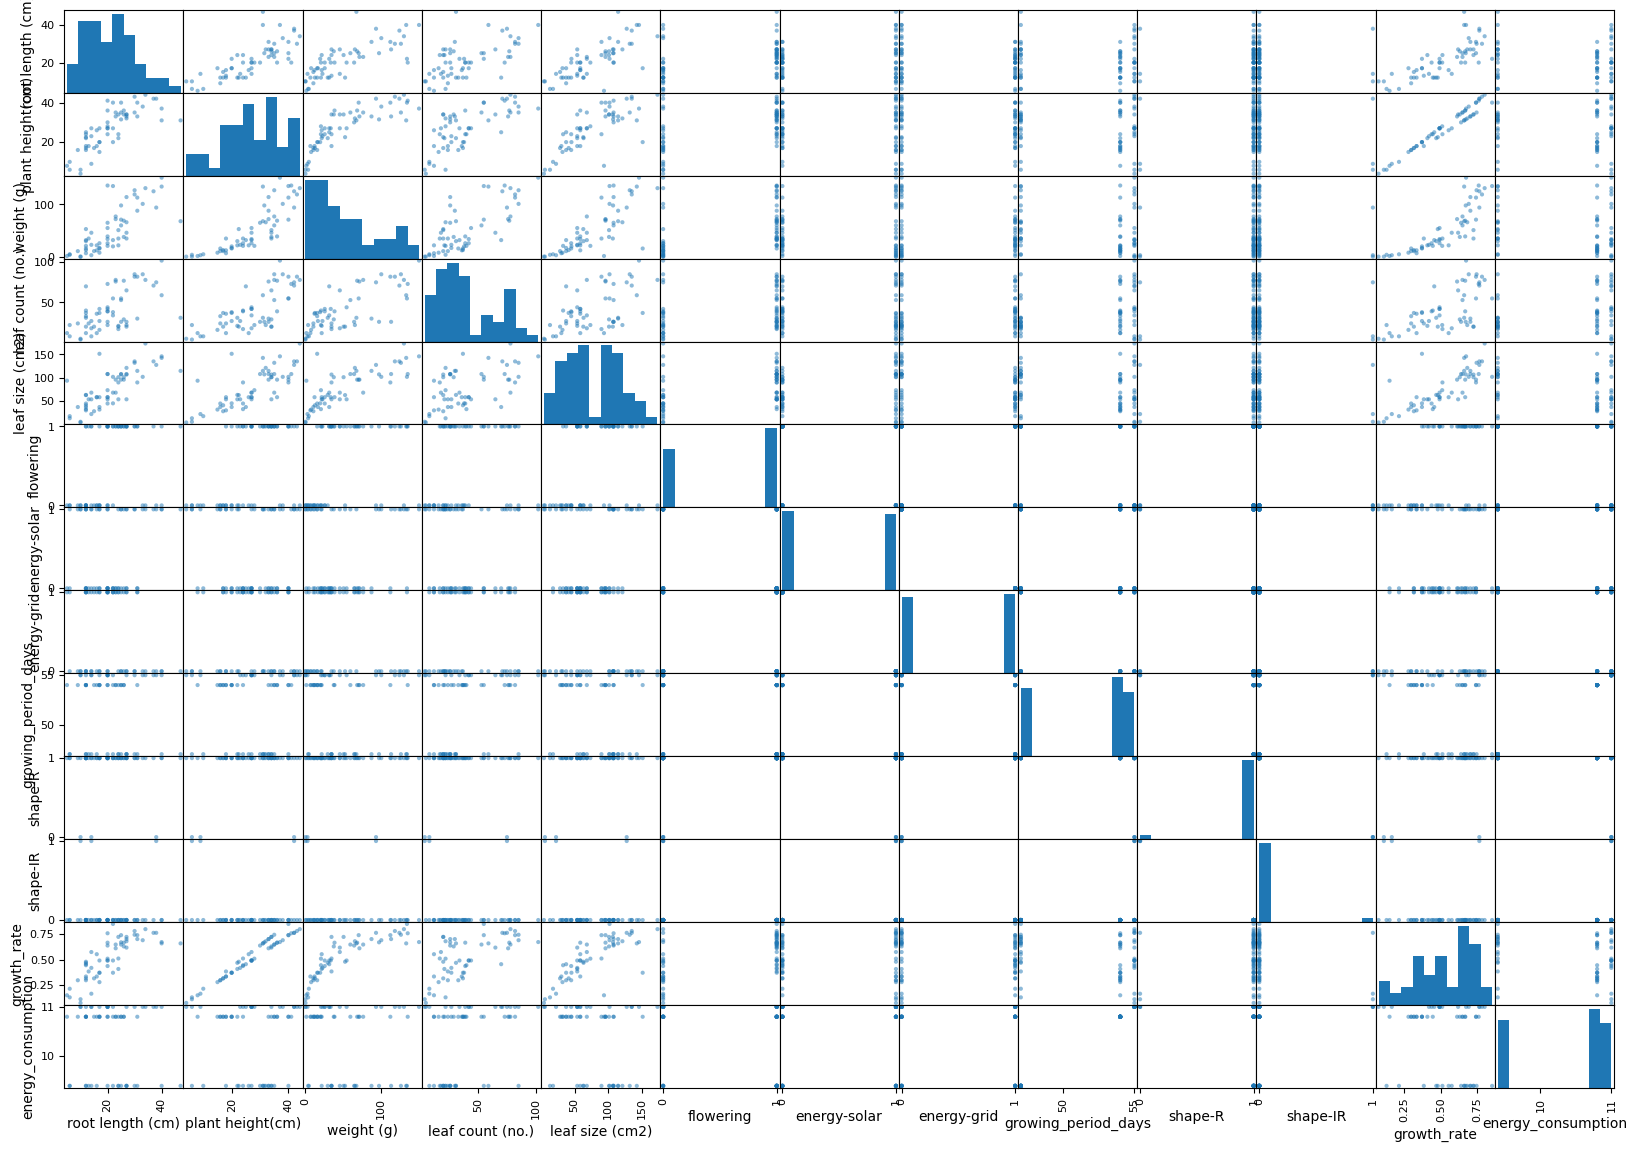

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20, 14))
plt.show()

In [23]:
cor_cols = ['growth_rate', 'energy_consumption', 'growing_period_days', 'root length (cm)', 'plant height(cm)', 'weight (g)', 'leaf count (no.)']

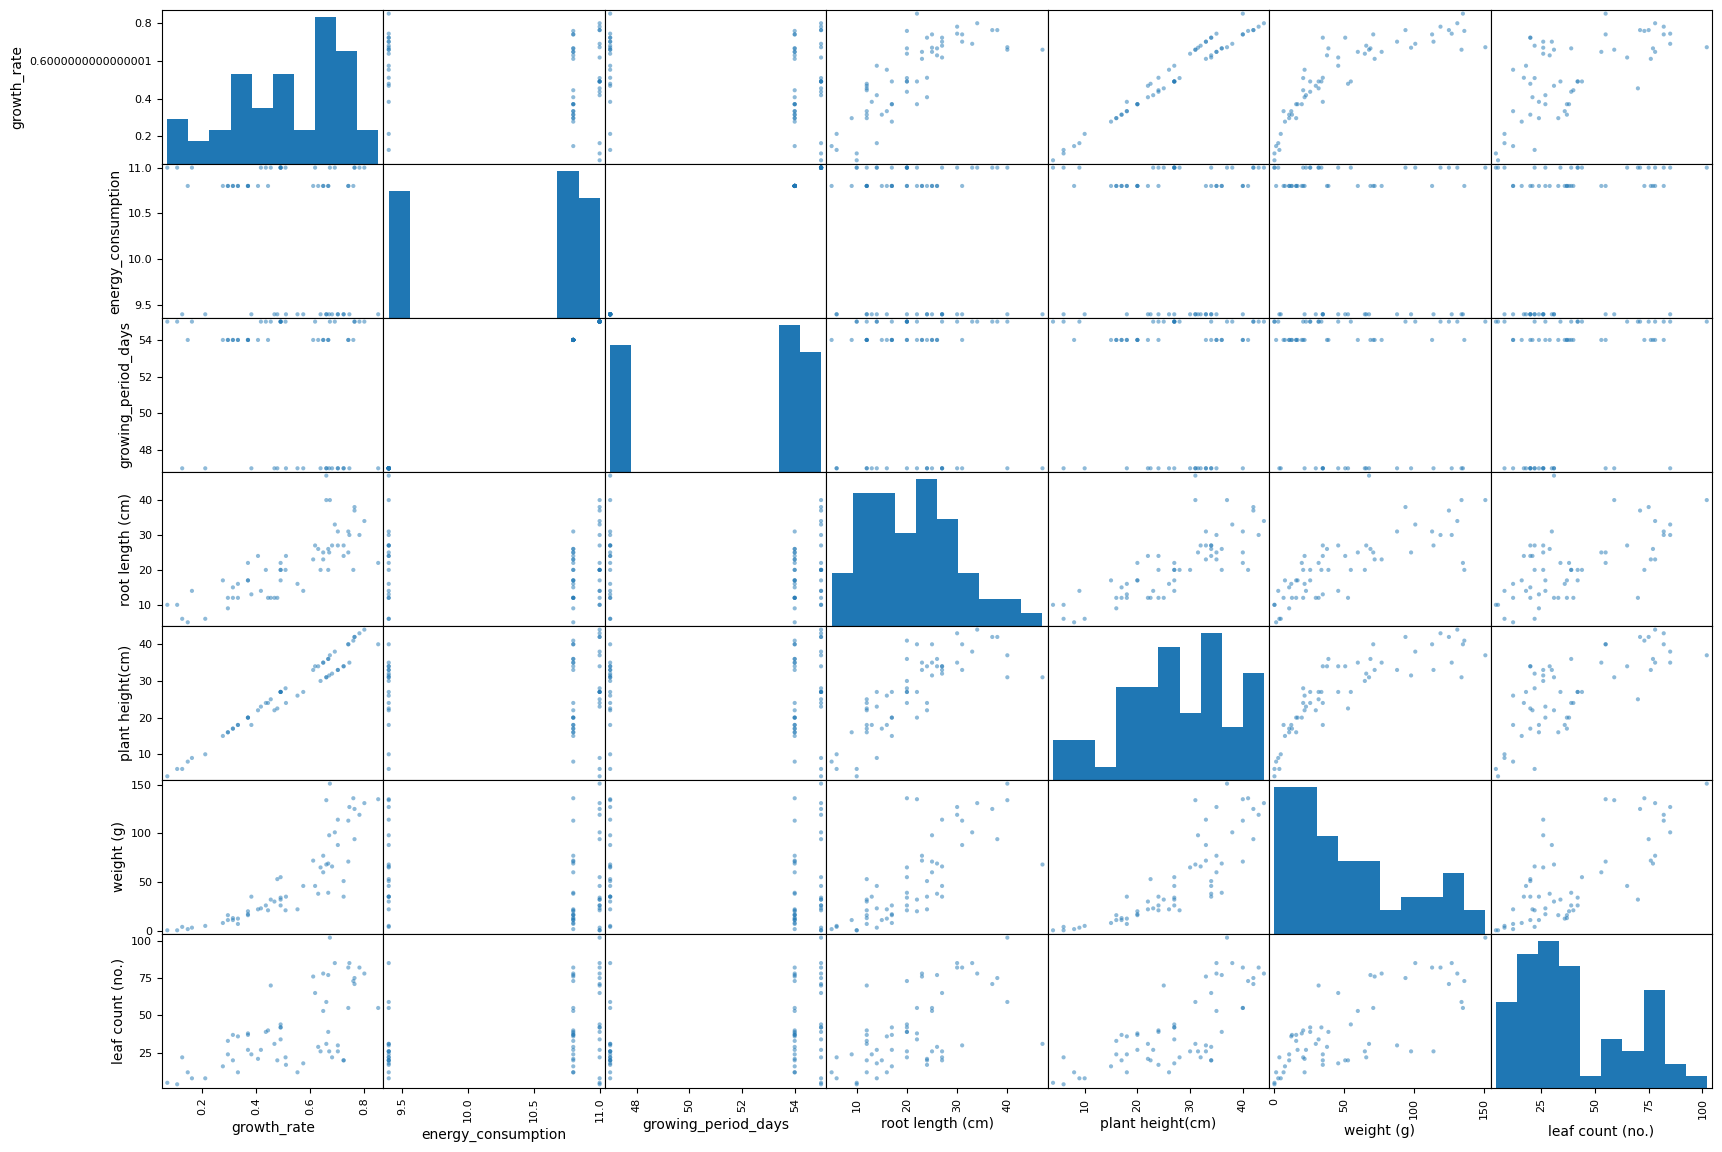

In [24]:
scatter_matrix(df[cor_cols], figsize=(20, 14))
plt.show()

In [25]:
df[cor_cols].corr()

,growth_rate,energy_consumption,growing_period_days,root length (cm),plant height(cm),weight (g),leaf count (no.)
growth_rate,1.000000,-0.205860,-0.205860,0.779690,0.980076,0.840651,0.641089
energy_consumption,-0.205860,1.000000,1.000000,-0.056410,-0.017888,-0.163388,0.319305
growing_period_days,-0.205860,1.000000,1.000000,-0.056410,-0.017888,-0.163388,0.319305
root length (cm),0.779690,-0.056410,-0.056410,1.000000,0.780908,0.763823,0.603555
plant height(cm),0.980076,-0.017888,-0.017888,0.780908,1.000000,0.827660,0.729393
weight (g),0.840651,-0.163388,-0.163388,0.763823,0.827660,1.000000,0.746359
leaf count (no.),0.641089,0.319305,0.319305,0.603555,0.729393,0.746359,1.000000


In [26]:
df_new = df.drop(columns=['growth_rate', 'energy_consumption','root length (cm)', 'plant height(cm)'])

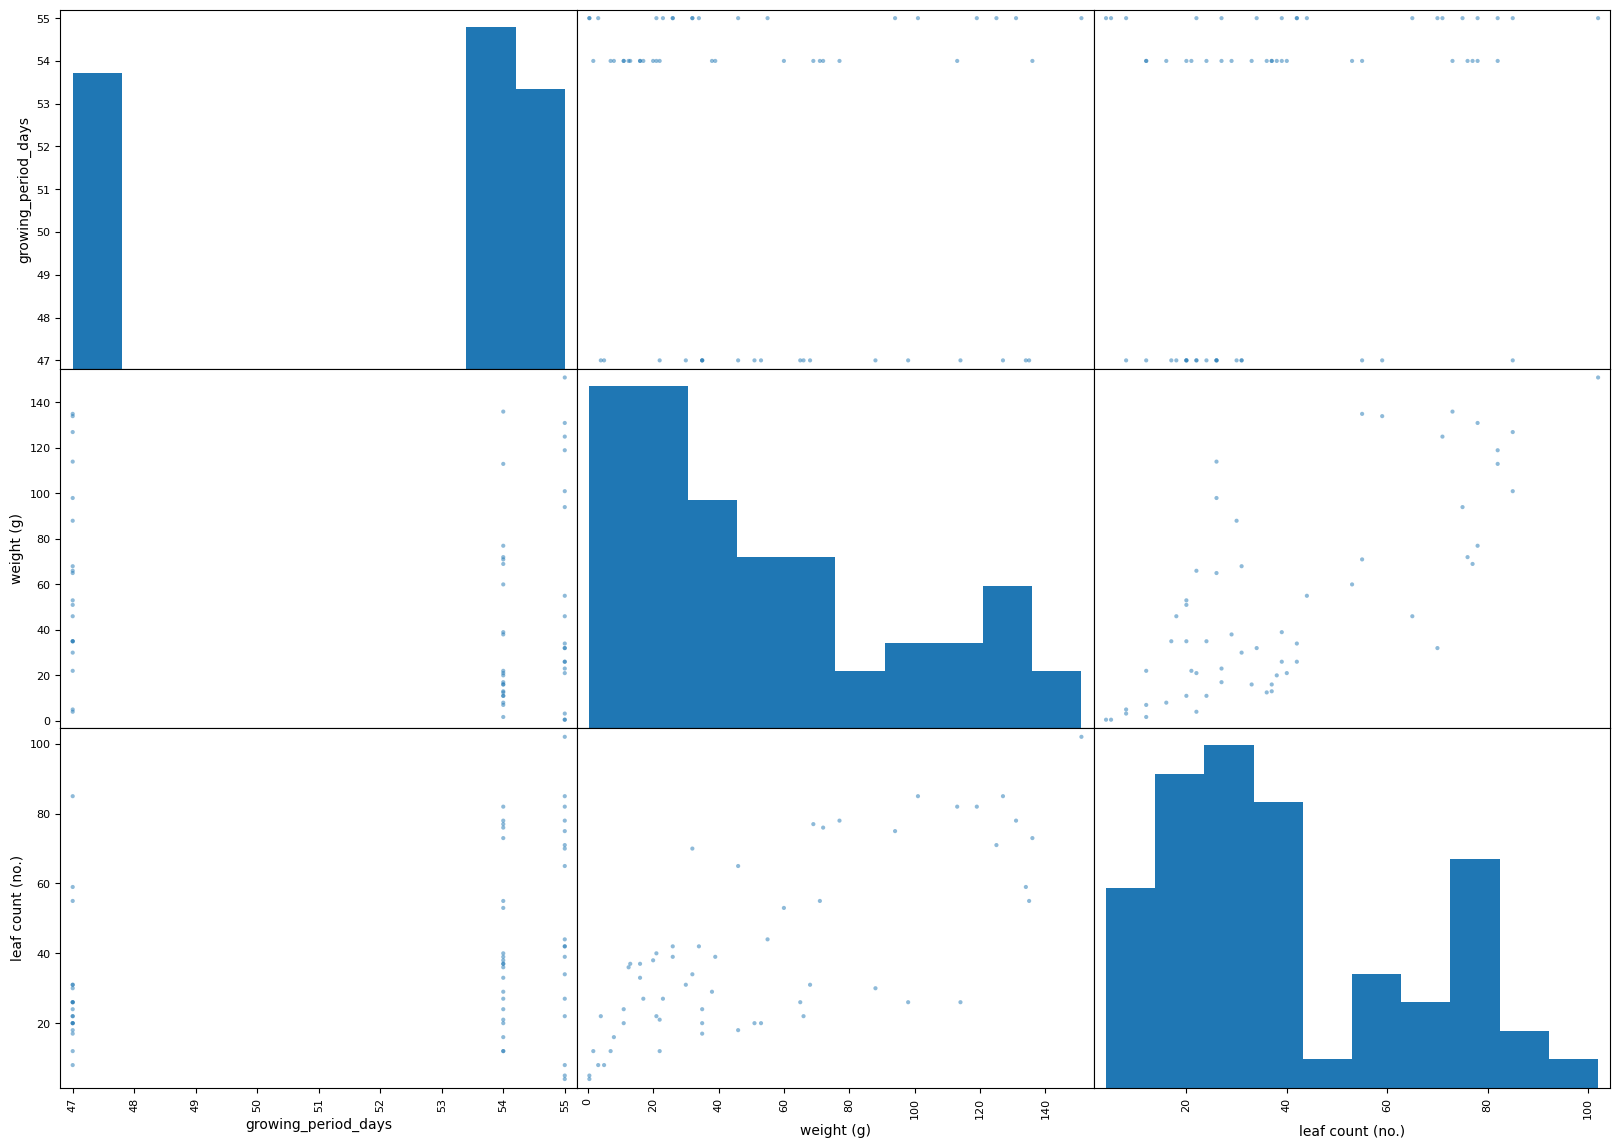

In [27]:
scatter_matrix(df_new[['growing_period_days', 'weight (g)', 'leaf count (no.)']], figsize=(20, 14))
plt.show()

In [28]:
df_new[['growing_period_days', 'weight (g)', 'leaf count (no.)']].corr()

,growing_period_days,weight (g),leaf count (no.)
growing_period_days,1.000000,-0.163388,0.319305
weight (g),-0.163388,1.000000,0.746359
leaf count (no.),0.319305,0.746359,1.000000


In [29]:
df_new.corr()

,weight (g),leaf count (no.),leaf size (cm2),flowering,energy-solar,energy-grid,growing_period_days,shape-R,shape-IR
weight (g),1.000000,0.746359,0.791490,0.416544,0.187101,-0.187101,-0.163388,0.106222,-0.106222
leaf count (no.),0.746359,1.000000,0.559418,0.267158,0.016455,-0.016455,0.319305,0.103148,-0.103148
leaf size (cm2),0.791490,0.559418,1.000000,0.433321,0.229161,-0.229161,-0.191795,0.145906,-0.145906
flowering,0.416544,0.267158,0.433321,1.000000,-0.186059,0.186059,-0.232204,0.269921,-0.269921
energy-solar,0.187101,0.016455,0.229161,-0.186059,1.000000,-1.000000,0.034100,-0.235412,0.235412
energy-grid,-0.187101,-0.016455,-0.229161,0.186059,-1.000000,1.000000,-0.034100,0.235412,-0.235412
growing_period_days,-0.163388,0.319305,-0.191795,-0.232204,0.034100,-0.034100,1.000000,-0.194745,0.194745
shape-R,0.106222,0.103148,0.145906,0.269921,-0.235412,0.235412,-0.194745,1.000000,-1.000000
shape-IR,-0.106222,-0.103148,-0.145906,-0.269921,0.235412,-0.235412,0.194745,-1.000000,1.000000


MODELLING

In [30]:
# standardised

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
target = 'weight (g)'
X = df_new.drop(target, axis=1)
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)


In [31]:
from sklearn.model_selection import train_test_split
X_scaled_df.head()
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, df_new[target], test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


0.8527520646129862

In [33]:
y_pred = reg.predict(X_test)
root_mean_squared_error(y_test, y_pred)

25.475478874146223

In [34]:
mean_squared_error(y_test, y_pred)

649.0000238670705

In [35]:
y_test.describe()

count     12.000000
mean      52.350000
std       55.011131
min        0.500000
25%        9.250000
50%       24.000000
75%      115.250000
max      136.000000
Name: weight (g), dtype: float64

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 37 to 39
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   leaf count (no.)     47 non-null     float64
 1   leaf size (cm2)      47 non-null     float64
 2   flowering            47 non-null     float64
 3   energy-solar         47 non-null     float64
 4   energy-grid          47 non-null     float64
 5   growing_period_days  47 non-null     float64
 6   shape-R              47 non-null     float64
 7   shape-IR             47 non-null     float64
dtypes: float64(8)
memory usage: 3.3 KB


In [37]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

def compare_models(X, y):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0)
    }
    
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=2, scoring='r2')
        print(f"\n{name}:")
        print(f"Mean R2: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

compare_models(X_train, y_train)


Linear Regression:
Mean R2: 0.771 (+/- 0.092)

Ridge:
Mean R2: 0.780 (+/- 0.119)

Lasso:
Mean R2: 0.790 (+/- 0.108)


In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 986.2880555555556
Root Mean Squared Error: 31.40522338012509
R-squared: 0.644457775720342


In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 479.7034060846561
Root Mean Squared Error: 21.902132455189292
R-squared: 0.8270740327502023


Removing the rest of correlated variables - leaf count and leaf size

In [41]:
df_new2 = df_new.drop(columns=['leaf count (no.)', 'leaf size (cm2)'])#, 'energy-grid', 'shape-IR'])

In [42]:
df_new2.corr()

,weight (g),flowering,energy-solar,energy-grid,growing_period_days,shape-R,shape-IR
weight (g),1.000000,0.416544,0.187101,-0.187101,-0.163388,0.106222,-0.106222
flowering,0.416544,1.000000,-0.186059,0.186059,-0.232204,0.269921,-0.269921
energy-solar,0.187101,-0.186059,1.000000,-1.000000,0.034100,-0.235412,0.235412
energy-grid,-0.187101,0.186059,-1.000000,1.000000,-0.034100,0.235412,-0.235412
growing_period_days,-0.163388,-0.232204,0.034100,-0.034100,1.000000,-0.194745,0.194745
shape-R,0.106222,0.269921,-0.235412,0.235412,-0.194745,1.000000,-1.000000
shape-IR,-0.106222,-0.269921,0.235412,-0.235412,0.194745,-1.000000,1.000000


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
target = 'weight (g)'
X = df_new2.drop(target, axis=1)


In [44]:
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [45]:
from sklearn.model_selection import train_test_split
# X_scaled_df.head()
X_train, X_test, y_train, y_test = train_test_split(X, df_new2[target], test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.13636853804871796

In [47]:
df_new2.head()

,weight (g),flowering,energy-solar,energy-grid,growing_period_days,shape-R,shape-IR
0,114.0,1.0,1.0,0.0,47.0,1.0,0.0
1,38.0,1.0,1.0,0.0,54.0,1.0,0.0
2,60.0,1.0,1.0,0.0,54.0,1.0,0.0
4,136.0,1.0,1.0,0.0,54.0,1.0,0.0
5,8.0,0.0,1.0,0.0,54.0,1.0,0.0


In [48]:
# import seaborn as sbn

# sbn.residplot(x=X_scaled_df, y=)

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2550.105972222222
Root Mean Squared Error: 50.49857396226375
R-squared: 0.08072459723541925


In [50]:
df_new3 = df_new.drop(columns=['energy-grid', 'shape-IR', 'leaf size (cm2)'])


In [51]:
df_new3.head()

,weight (g),leaf count (no.),flowering,energy-solar,growing_period_days,shape-R
0,114.0,26.0,1.0,1.0,47.0,1.0
1,38.0,29.0,1.0,1.0,54.0,1.0
2,60.0,53.0,1.0,1.0,54.0,1.0
4,136.0,73.0,1.0,1.0,54.0,1.0
5,8.0,16.0,0.0,1.0,54.0,1.0


In [52]:
df_new3.corr()

,weight (g),leaf count (no.),flowering,energy-solar,growing_period_days,shape-R
weight (g),1.000000,0.746359,0.416544,0.187101,-0.163388,0.106222
leaf count (no.),0.746359,1.000000,0.267158,0.016455,0.319305,0.103148
flowering,0.416544,0.267158,1.000000,-0.186059,-0.232204,0.269921
energy-solar,0.187101,0.016455,-0.186059,1.000000,0.034100,-0.235412
growing_period_days,-0.163388,0.319305,-0.232204,0.034100,1.000000,-0.194745
shape-R,0.106222,0.103148,0.269921,-0.235412,-0.194745,1.000000


In [53]:

arget = 'weight (g)'
X = df_new3.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, df_new3[target], test_size=0.2, random_state=42)

In [54]:
# linear regression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.8307410666237733

In [55]:
X.columns

Index(['leaf count (no.)', 'flowering', 'energy-solar', 'growing_period_days',
       'shape-R'],
      dtype='object')

In [56]:
reg.coef_

array([ 1.57615724,  6.9831056 , 17.09377776, -5.77112759, -7.26759782])

In [57]:
# decision tree

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 549.5105555555557
Root Mean Squared Error: 23.44164148594453
R-squared: 0.8019095901173389


In [58]:
X.head()

,leaf count (no.),flowering,energy-solar,growing_period_days,shape-R
0,26.0,1.0,1.0,47.0,1.0
1,29.0,1.0,1.0,54.0,1.0
2,53.0,1.0,1.0,54.0,1.0
4,73.0,1.0,1.0,54.0,1.0
5,16.0,0.0,1.0,54.0,1.0


In [59]:
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, df_new3[target], test_size=0.2, random_state=42)

In [60]:
X_train.head()

,leaf count (no.),flowering,energy-solar,growing_period_days,shape-R
37,0.079409,0.857493,-0.983192,0.841395,0.231455
32,-1.132264,-1.166190,-0.983192,0.556094,0.231455
9,-0.566817,0.857493,1.017095,-1.441010,0.231455
18,-1.293820,-1.166190,-0.983192,-1.441010,0.231455
7,-0.647595,-1.166190,1.017095,0.556094,0.231455


In [61]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.8307410666237733

In [62]:
reg.feature_names_in_

array(['leaf count (no.)', 'flowering', 'energy-solar',
       'growing_period_days', 'shape-R'], dtype=object)

In [63]:
reg.coef_

array([ 39.02432282,   3.45069092,   8.54566114, -20.22823451,
        -1.59659041])

Decision trees don't care about standardisation

In [64]:
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 549.5105555555557
Root Mean Squared Error: 23.44164148594453
R-squared: 0.8019095901173389


In [65]:
data['cor harvest date'].max()

Timestamp('2025-05-12 00:00:00')

In [66]:
data['planting date'].min()

Timestamp('2025-03-18 00:00:00')

=======================================================
##### Adding total number of hours of light between planting and harvest date for PV and NG sensorts 
=======================================================

In [67]:
pv_df = pd.read_csv('sensor_data/PV_Consolidated_data.csv', delimiter=';', header = 0)
ng_df = pd.read_csv('sensor_data/NG_Consolidated_data.csv', delimiter=';', header = 0)

ng_df['Timestamp'] = pd.to_datetime(ng_df['Timestamp'])
pv_df['Timestamp'] = pd.to_datetime(pv_df['Timestamp'])

In [68]:
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2666 non-null   datetime64[ns]
 1   br2        2666 non-null   float64       
 2   ec         2666 non-null   float64       
 3   hum        2666 non-null   float64       
 4   ph         2666 non-null   float64       
 5   tp         2666 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 125.1 KB


In [69]:
from datetime import datetime

def calculate_hours_br1_greater_than_one(df, br):
    """
    Calculate the total hours per date where br1 > 1
    
    Parameters:
    df (pandas.DataFrame): DataFrame with columns 'Timestamp' and 'br1'
    
    Returns:
    dict: Dictionary with dates as keys and hours as values
    """
    # Ensure Timestamp is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Extract date from timestamp
    df['Date'] = df['Timestamp'].dt.date
    
    # Filter rows where br1 > 1
    filtered_df = df[df[br] > 1]
    
    time_diff = 0.5
    
    # Group by date and count occurrences, then multiply by time interval
    result = filtered_df.groupby('Date').size() * time_diff
    return result.to_dict()
    



Creating a new column in the plant harvest dataset - how many total hours of br each plant had 

In [70]:
cols_to_keep = ['weight (g)', 'flowering', 
    'energy-solar', 'energy-grid', 'growing_period_days',
    'shape-R', 'shape-IR', 'planting date', 'cor harvest date']
plant_df = data[cols_to_keep].copy()
plant_df.dropna(subset=['flowering'], inplace=True)

In [71]:
plant_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 59
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   weight (g)           59 non-null     float64       
 1   flowering            59 non-null     float64       
 2   energy-solar         59 non-null     float64       
 3   energy-grid          59 non-null     float64       
 4   growing_period_days  59 non-null     float64       
 5   shape-R              59 non-null     float64       
 6   shape-IR             59 non-null     float64       
 7   planting date        59 non-null     datetime64[ns]
 8   cor harvest date     59 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(7)
memory usage: 4.6 KB


In [72]:
from datetime import timedelta

def calculate_total_light_hours_per_plant(plants_df, solar_light_hours, grid_light_hours):
    """
    Calculate the total hours of light each plant received between planting and harvest,
    using solar or grid light hours based on the 'energy-solar' column
    
    Parameters:
    plants_df (pandas.DataFrame): DataFrame with plant data including 'planting date', 
                                 'cor harvest date', and 'energy-solar'
    solar_light_hours (dict): Dictionary with dates as keys and solar light hours as values
    grid_light_hours (dict): Dictionary with dates as keys and grid light hours as values
    
    Returns:
    pandas.DataFrame: Original DataFrame with added 'total_light_hours' column
    """

    # Function to calculate light hours for a single plant
    def get_light_hours_for_plant(plant_row):
        planting_date = plant_row['planting date'].date()
        harvest_date = plant_row['cor harvest date'].date()
        
        # Determine which light hour dictionary to use based on energy-solar value
        if plant_row['energy-solar'] == 1.0:
            light_hours_dict = solar_light_hours
        else:
            light_hours_dict = grid_light_hours
        
        # Generate all dates between planting and harvest (inclusive)
        date_range = []
        current_date = planting_date
        while current_date <= harvest_date:
            date_range.append(current_date)
            current_date += timedelta(days=1)
        
        # Sum up the light hours for each date in the range
        total_hours = 0
        for date in date_range:
            # Get light hours for this date if available, otherwise assume 0
            if date in light_hours_dict:
                total_hours += light_hours_dict[date]
        
        return total_hours
    
    # Apply the function to each row
    plants_df['total_light_hours'] = plants_df.apply(get_light_hours_for_plant, axis=1)
    
    return plants_df

In [73]:
pv_br2_hrs = calculate_hours_br1_greater_than_one(pv_df, 'br2')
ng_br1_hrs = calculate_hours_br1_greater_than_one(ng_df, 'br1')


result_df = calculate_total_light_hours_per_plant(plant_df, solar_light_hours=pv_br2_hrs, grid_light_hours=ng_br1_hrs)
# print(result_df[['planting date', 'cor harvest date', 'total_light_hours']])

In [74]:
result_df.head()

,weight (g),flowering,energy-solar,energy-grid,growing_period_days,shape-R,shape-IR,planting date,cor harvest date,total_light_hours
0,114.0,1.0,1.0,0.0,47.0,1.0,0.0,2025-03-18,2025-05-04,607.0
1,38.0,1.0,1.0,0.0,54.0,1.0,0.0,2025-03-18,2025-05-11,698.0
2,60.0,1.0,1.0,0.0,54.0,1.0,0.0,2025-03-18,2025-05-11,698.0
4,136.0,1.0,1.0,0.0,54.0,1.0,0.0,2025-03-18,2025-05-11,698.0
5,8.0,0.0,1.0,0.0,54.0,1.0,0.0,2025-03-18,2025-05-11,698.0


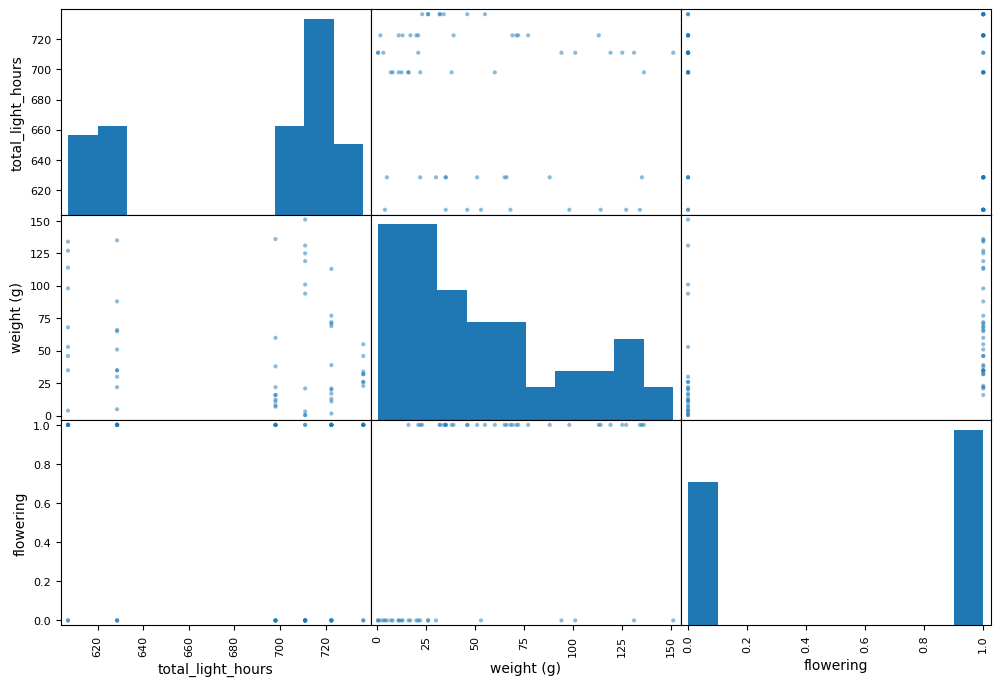

In [75]:
scatter_matrix(result_df[['total_light_hours', 'weight (g)', 'flowering']], figsize=(12, 8))
plt.show()

In [76]:
result_df.corr()

,weight (g),flowering,energy-solar,energy-grid,growing_period_days,shape-R,shape-IR,planting date,cor harvest date,total_light_hours
weight (g),1.000000,0.416544,0.187101,-0.187101,-0.163388,0.106222,-0.106222,NaN,-0.163388,-0.206341
flowering,0.416544,1.000000,-0.186059,0.186059,-0.232204,0.269921,-0.269921,NaN,-0.232204,-0.176384
energy-solar,0.187101,-0.186059,1.000000,-1.000000,0.034100,-0.235412,0.235412,NaN,0.034100,-0.217347
energy-grid,-0.187101,0.186059,-1.000000,1.000000,-0.034100,0.235412,-0.235412,NaN,-0.034100,0.217347
growing_period_days,-0.163388,-0.232204,0.034100,-0.034100,1.000000,-0.194745,0.194745,NaN,1.000000,0.967959
shape-R,0.106222,0.269921,-0.235412,0.235412,-0.194745,1.000000,-1.000000,NaN,-0.194745,-0.127882
shape-IR,-0.106222,-0.269921,0.235412,-0.235412,0.194745,-1.000000,1.000000,NaN,0.194745,0.127882
planting date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cor harvest date,-0.163388,-0.232204,0.034100,-0.034100,1.000000,-0.194745,0.194745,NaN,1.000000,0.967959
total_light_hours,-0.206341,-0.176384,-0.217347,0.217347,0.967959,-0.127882,0.127882,NaN,0.967959,1.000000


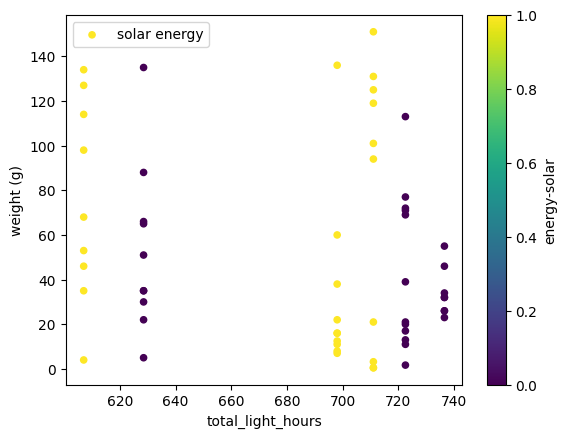

In [77]:
result_df.plot.scatter(x='total_light_hours', y = 'weight (g)', c = 'energy-solar')
plt.legend(['solar energy', 'grid energy'])

In [ ]:
result_df['energy source'] = result_df['energy-solar'].copy().map({1: 'solar', 0: 'grid'}) 

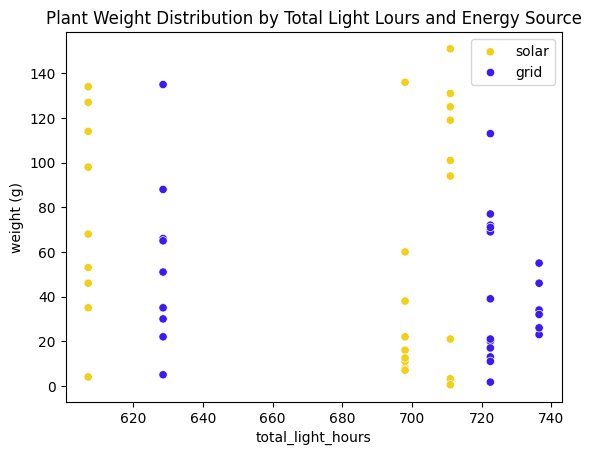

In [151]:
sns.scatterplot(
    x="total_light_hours", y="weight (g)", 
    hue="energy-solar", palette = ['#3c1af2', '#f2cf1a'],
    data=result_df
)
plt.title("Plant Weight Distribution by Total Light Lours and Energy Source")
# plt.legend(bbox_to_anchor=(0.6,1))
plt.legend(['solar', 'grid'])
plt.show()

<Axes: ylabel='total_light_hours'>

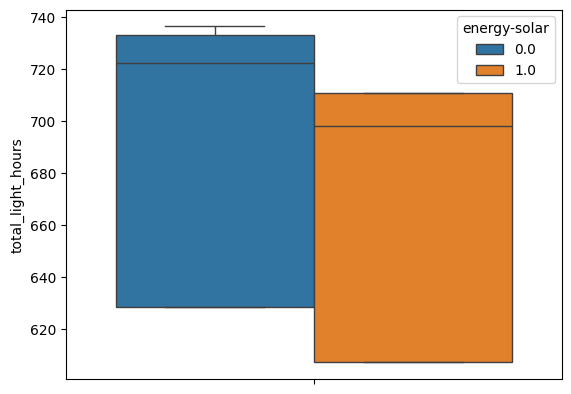

In [96]:


sns.boxplot(y = result_df['total_light_hours'], hue = result_df['energy-solar'])
# plt.title('Total light hours and weight distribution by grid/solar energy')
# plt.show()


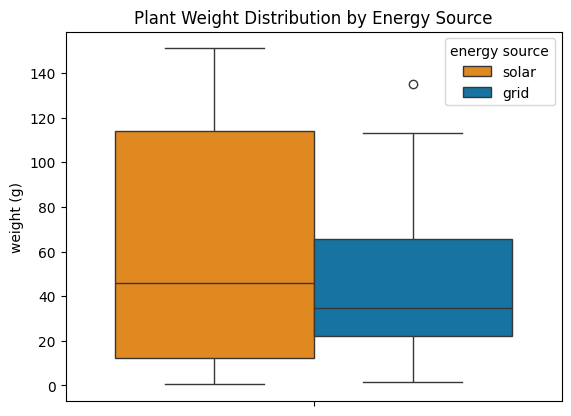

In [130]:
sns.boxplot(y = result_df['weight (g)'], hue = result_df['energy source'], palette = [ 'darkorange', '#007bb8'])
sns.color_palette("hls", 8)
plt.title('Plant Weight Distribution by Energy Source')
plt.show()

#### MODELLING

<Axes: xlabel='growing_period_days', ylabel='total_light_hours'>

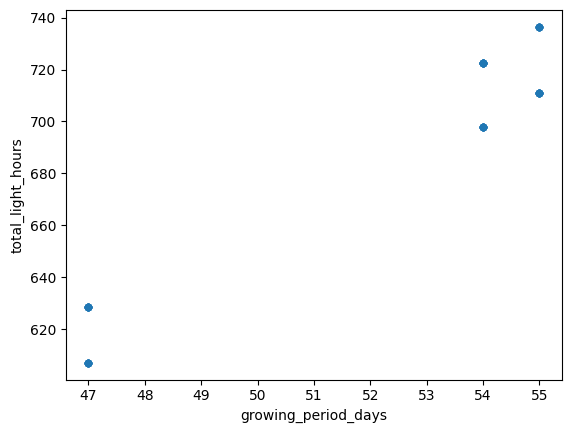

In [81]:
result_df.plot.scatter(x = 'growing_period_days', y = 'total_light_hours')

In [82]:
cols_to_keep = ['weight (g)', 'flowering', 'energy-solar', 'shape-R', 'total_light_hours']
result_df[cols_to_keep].head()

,weight (g),flowering,energy-solar,shape-R,total_light_hours
0,114.0,1.0,1.0,1.0,607.0
1,38.0,1.0,1.0,1.0,698.0
2,60.0,1.0,1.0,1.0,698.0
4,136.0,1.0,1.0,1.0,698.0
5,8.0,0.0,1.0,1.0,698.0


In [83]:
df_final = result_df[cols_to_keep].copy()
X = df_final.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, df_final[target], test_size=0.2, random_state=42)

Decision Trees

In [84]:

tree_regressor = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Decision Tree\nMean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Decision Tree
Mean Squared Error: 2261.8849717078187
Root Mean Squared Error: 47.55927850280972
R-squared: 0.1846239956208915


In [85]:
df_final[target].describe()

count     59.000000
mean      52.244068
std       43.244447
min        0.500000
25%       18.500000
50%       35.000000
75%       74.500000
max      151.000000
Name: weight (g), dtype: float64

Linear Regression (with standardisation)

In [86]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, df_final[target], test_size=0.2, random_state=42)



In [87]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f'Linear Regression (with Standardisation)\nMSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
print(f'R2 score: {r2_score(y_test, y_pred)}')

Linear Regression (with Standardisation)
MSE: 1625.5554088796534
RMSE: 40.31817715224305
R2 score: 0.41401137070715954


Plotting the residuals for Lin Reg

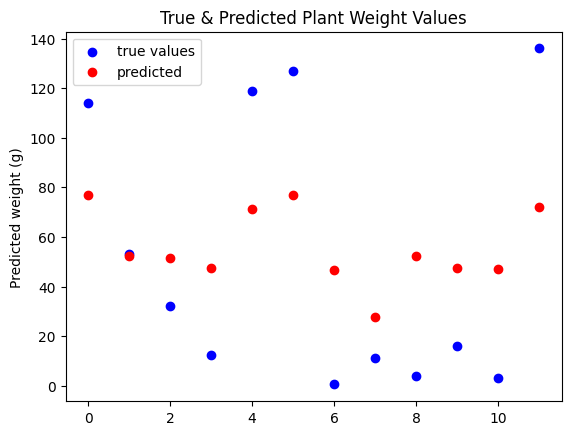

In [88]:
# def multi_y_scatter(x, ys, colors):
#     for y, color in zip(ys, colors):
#         plt.scatter(x, y, color=color)
# Sample data
# x = [1, 2, 3, 4]
# ys = [[1, 4, 9, 16], [2, 4, 6, 8]]
# colors = ['blue', 'red']
# Plotting
x = range(len(y_test))
# multi_y_scatter(x, ys, colors)
plt.scatter(x, y_test, color='blue')
plt.scatter(x, y_pred, color='red')
plt.legend(['true values', 'predicted']) 
plt.ylabel('Predicted weight (g)')
plt.title('True & Predicted Plant Weight Values')
plt.show()

Residuals plot

<Axes: xlabel='total_light_hours', ylabel='weight (g)'>

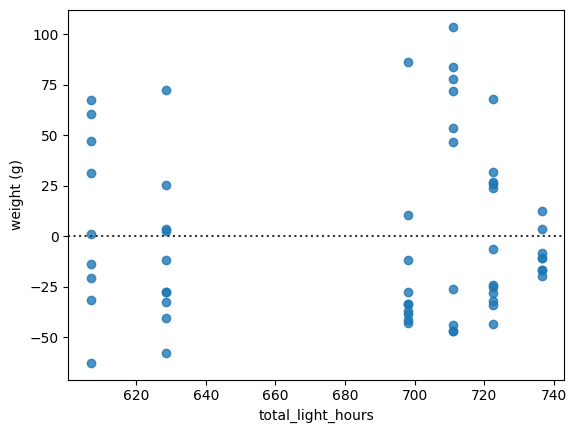

In [89]:
sns.residplot(data=df_final, x="total_light_hours", y=target, line_kws=dict(color="r"))

KNN after standardization

In [90]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'KNN\nMean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

KNN
Mean Squared Error: 2241.659259259259
Root Mean Squared Error: 47.34616414514759
R-squared: 0.19191506515285583


KNN after normalisation

In [91]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
normalised_X = minmax.fit_transform(X)
X_norm_df = pd.DataFrame(normalised_X, columns=X.columns, index=X.index)
X_train, X_test, y_train, y_test = train_test_split(X_norm_df, df_final[target], test_size=0.2, random_state=42)

In [92]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'KNN\nMean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

KNN
Mean Squared Error: 2241.659259259259
Root Mean Squared Error: 47.34616414514759
R-squared: 0.19191506515285583


Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=30, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=42)

In [106]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest\nMean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Random Forest
Mean Squared Error: 2298.0225508457665
Root Mean Squared Error: 47.93769446735801
R-squared: 0.17159693400900677


====================== OLD DATA BELOW =================

#### OLD DATA

In [ ]:
data.drop([0, 1], inplace=True)
data.reset_index(inplace=True)
data.drop(columns=['index', 'sample_id', 'Notes'], inplace=True)

In [ ]:
numeric_cols = ['plant_length_cm', 'plant_width_cm', 'crop_yield_g',
                'root_len_cm', 'plant_height', 'chlorophyll_mgg', 
                'plant_dry_matter', 'leaf_count', 'leaf_size',
                'water_use_efficiency','energy_consumption', 'growth_rate', 
                'nutrient_absorption_efficiency',]
target = ['marketable_yield']

category_cols = ['solar_grid', 'shape', 'root_health', 'disease_occurrence_trend']

In [ ]:
data[numeric_cols+target] = data[numeric_cols+target].apply(pd.to_numeric, downcast='float')

In [ ]:
data['solar_grid_edit'] = data['solar_grid']=='S'  # True(1) if S for solar grid, False(0) if not

In [ ]:
data['shape_edit'] = data['shape']=='R'  # True(1) if regular shape, False(0) if not

In [ ]:
data['root_health_edit'] = data['root_health'].replace({'GOOD': 2, 'FAIR': 1, 'POOR': 0})
data['disease_occurrence_trend_edit'] = data['disease_occurrence_trend'].replace({'Low': 2, 'Moderate': 1, 'High': 0})


In [ ]:
data_new = data.drop(columns=category_cols)

In [ ]:
data_new.info()

EDA

In [ ]:
data_new[numeric_cols+target].corr()

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_new[numeric_cols+target], figsize=(12, 8))
plt.show()

In [ ]:
data_new[numeric_cols+target].describe()

#### Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data_new.drop(target, axis=1)
X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# df_scaled = pd.concat([X_scaled_df, data_new[target]], axis=1)

In [ ]:
X_scaled_df.head()
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, data_new[target], test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


In [ ]:
y_pred = reg.predict(X_test)
root_mean_squared_error(y_test, y_pred)

In [ ]:
y_test.describe()

Dimensionality reduction - PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

def apply_pca(X_scaled, y, n_components=7):

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Get explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    # Create DataFrame with transformed features
    pca_df = pd.DataFrame(
        X_pca, 
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    
    # Add target back to DataFrame
    pca_df['target'] = y.values
    
    # Print variance explained
    print("\nExplained variance ratio by component:")
    for i, var in enumerate(explained_variance):
        print(f"PC{i+1}: {var:.3f}")
    
    print("\nCumulative explained variance ratio:")
    for i, var in enumerate(cumulative_variance):
        print(f"First {i+1} components: {var:.3f}")
        
    return pca_df, pca, scaler

In [ ]:
pca_df, pca, scaler = apply_pca(X_scaled=X_scaled, y = data_new[target], n_components=7)

In [ ]:
X = pca_df.drop('target', axis=1)
y = pca_df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Modelling on post-PCA dataset

In [ ]:
reg_PCA = LinearRegression().fit(X_train, y_train)
reg_PCA.score(X_train, y_train)

In [ ]:
y_pred = reg_PCA.predict(X_test)
root_mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

def compare_models(X, y):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0)
    }
    
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=2, scoring='r2')
        print(f"\n{name}:")
        print(f"Mean R2: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

compare_models(X_train, y_train)

Ridge

In [ ]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
ridge.score(X_train, y_train)

In [ ]:
y_pred = ridge.predict(X_test)
root_mean_squared_error(y_test, y_pred)

Lasso

In [ ]:
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
lasso.score(X_train, y_train)

In [ ]:
y_pred = lasso.predict(X_test)
root_mean_squared_error(y_test, y_pred)

Remaining

Decision Tree with:

    Limited depth
    Strong pruning parameters
    Simple rules

Simple KNN

    With small k value (e.g., k=3)
    Easy to interpret



KNN (with k=3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

In [ ]:
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

In [ ]:
y_test

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

In [ ]:
y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')